Nosso objetivo do processo é gerar amostras aleatórias da distribuição exponencial com densidade de probabilidade $f(x) \sim Exp(\frac{-|x|^{3}}{3})$. Para isso, é aplicamos o método de inversão da função de distribuição cumulativa, que depende da função de distribuição cumulativa da distribuição exponencial com parâmetro $\lambda$. 

No entanto, a função de distribuição cumulativa da distribuição exponencial com densidade de probabilidade $f(x) \sim Exp(\frac{-|x|^{3}}{3})$ não tem uma forma analítica simples, exigindo assim a utilização da técnica de simulação de Monte Carlo para aproximar a inversa da função de distribuição cumulativa.

In [ ]:
# Definir a função de distribuição cumulativa e sua inversa aproximada:
import numpy as np
from scipy.interpolate import interp1d

def cdf_exp(x, lamb):
    return np.where(x >= 0, 1 - np.exp(-lamb * x), 0)

def inv_cdf_exp(n, lamb):
    u = np.random.uniform(size=n)
    x = np.linspace(0, 5 / lamb, num=1000)
    y = cdf_exp(x, lamb)
    inv_cdf = interp1d(y, x, kind='linear', fill_value='extrapolate')
    return inv_cdf(u)


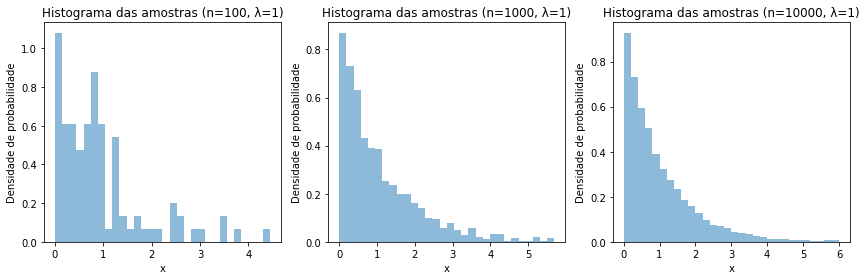

In [ ]:
from matplotlib import pyplot as plt

# Gerar amostras aleatórias:

lamb = 1

ns = [100, 1000, 10000]

samples = []
for n in ns:
    x = inv_cdf_exp(n, lamb)
    samples.append(x)

# plotar histogramas das amostras geradas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, n in enumerate(ns):
    axs[i].hist(samples[i], bins=30, density=True, alpha=0.5, label='Amostras')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('Densidade de probabilidade')
    axs[i].set_title(f'Histograma das amostras (n={n}, λ={lamb})')
plt.tight_layout()
plt.show()
